In [1]:
library(dplyr)
library(ggplot2)
library(plotly)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'plotly'


The following object is masked from 'package:ggplot2':

    last_plot


The following object is masked from 'package:stats':

    filter


The following object is masked from 'package:graphics':

    layout




In [2]:
Store_data <- read.csv("C:/Users/apolo/Desktop/Stores.csv")

### Check the data

In [3]:
head(Store_data)

,ï..Store.ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
,<int>,<int>,<int>,<int>,<int>
1,1,1659,1961,530,66490
2,2,1461,1752,210,39820
3,3,1340,1609,720,54010
4,4,1451,1748,620,53730
5,5,1770,2111,450,46620
6,6,1442,1733,760,45260


In [4]:
glimpse(Store_data)

Rows: 896
Columns: 5
$ ï..Store.ID          <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15~
$ Store_Area           <int> 1659, 1461, 1340, 1451, 1770, 1442, 1542, 1261, 1~
$ Items_Available      <int> 1961, 1752, 1609, 1748, 2111, 1733, 1858, 1507, 1~
$ Daily_Customer_Count <int> 530, 210, 720, 620, 450, 760, 1030, 1020, 680, 11~
$ Store_Sales          <int> 66490, 39820, 54010, 53730, 46620, 45260, 72240, ~


### Data cleaning

In [5]:
# check NULL
is.null(Store_data)

[1] FALSE

In [6]:
# Data cleaning delete duplicate
Store_data_completed <- Store_data[!duplicated(Store_data), ]

In [7]:
# check the summary of Store_data_completed
Store_data <- Store_data_completed
summary(Store_data)

  ï..Store.ID      Store_Area   Items_Available Daily_Customer_Count
 Min.   :  1.0   Min.   : 775   Min.   : 932    Min.   :  10.0      
 1st Qu.:224.8   1st Qu.:1317   1st Qu.:1576    1st Qu.: 600.0      
 Median :448.5   Median :1477   Median :1774    Median : 780.0      
 Mean   :448.5   Mean   :1485   Mean   :1782    Mean   : 786.4      
 3rd Qu.:672.2   3rd Qu.:1654   3rd Qu.:1983    3rd Qu.: 970.0      
 Max.   :896.0   Max.   :2229   Max.   :2667    Max.   :1560.0      
  Store_Sales    
 Min.   : 14920  
 1st Qu.: 46530  
 Median : 58605  
 Mean   : 59351  
 3rd Qu.: 71873  
 Max.   :116320  

### Data Analysis

#### Analysis, Store_Area with Store_Sales

In [8]:
a=Store_data %>%
  group_by(Store_Area) %>%
  summarise(Total=sum(Store_Sales))
a=arrange(a,-a$Total)

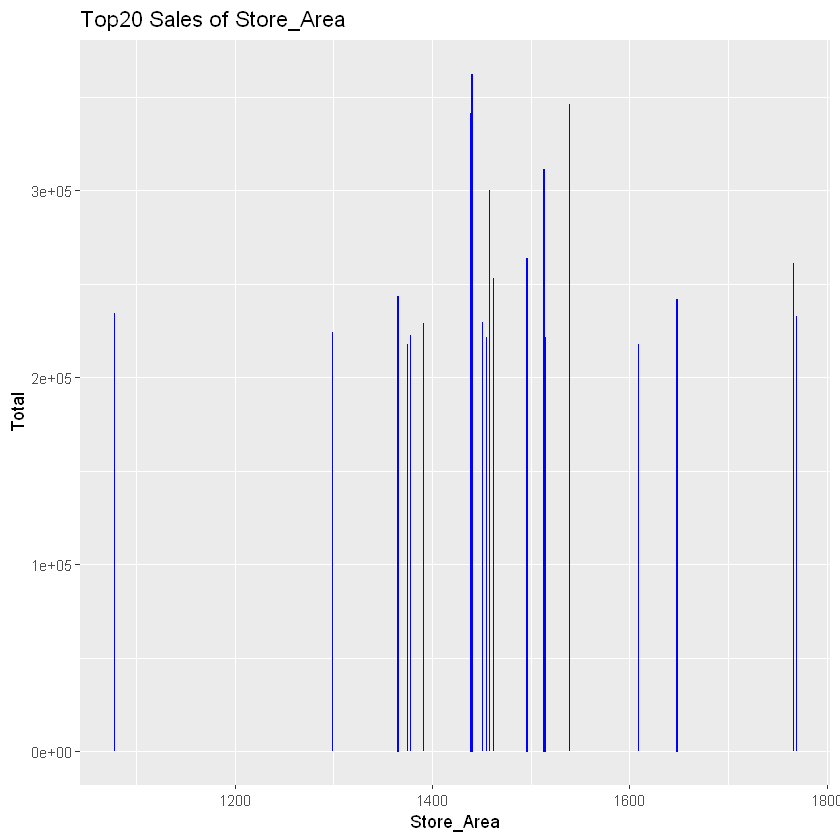

In [9]:
# data visualization on Top20 Sales of Store_Area
a_top20 = a %>% slice(1:20)

ggplot(data=a_top20, aes(x=Store_Area, y=Total)) +
  geom_bar(stat="identity", color="blue", fill="white",width=0.5) +
  labs(x="Store_Area", title="Top20 Sales of Store_Area")

### Analysis, Items_Available with Daily_Customer_Count

Since there is no lead time information, cannot directly calculate the Safety Inventory

The Daily_Customer_Count is a index to show the demand of products, inventory/Daily_Customer_Count considers as a criteria to evaluate the inventory level


In [10]:
mean((Store_data$Items_Available)/(Store_data$Daily_Customer_Count))

[1] 2.836342

In [11]:
# Let's consider equal or above 3 is great inventory status,1.5-3 is normal inventory status, less than 1.5 is lack inventory status.
Store_data$Inventory_Rate <- (Store_data$Items_Available)/(Store_data$Daily_Customer_Count)
Store_data$Inventory_Statu <- case_when( Store_data$Inventory_Rate >=3 ~'Great',
                                         Store_data$Inventory_Rate >=1.5 ~'Normal',
                                         TRUE ~ 'Lack')

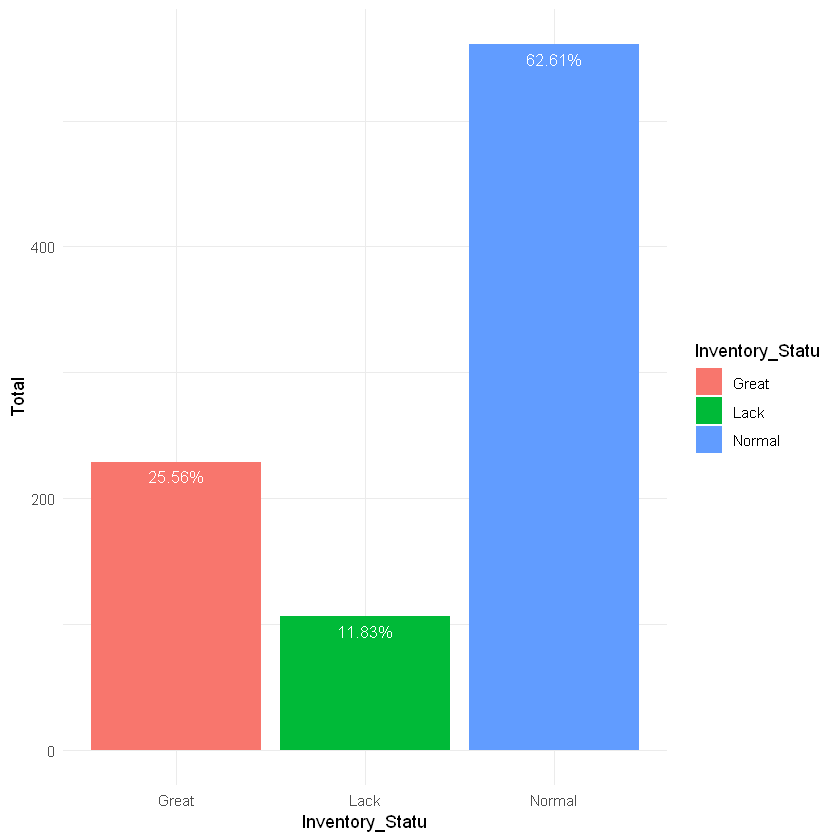

In [12]:
b=Store_data %>%
  group_by(Inventory_Statu) %>%
  summarise(Total=n())
# Bar plot of Different Inventory_Status
ggplot(b, aes(x=Inventory_Statu, y=Total, fill=Inventory_Statu)) +
  geom_bar(stat="identity")+
  geom_text(aes(label=scales::percent(Total/length(Store_data$Items_Available), accuracy = 0.01)), vjust=1.6, color="white", size=3.5)+
  theme_minimal()

### Data Visiulization of Inventory_Rate

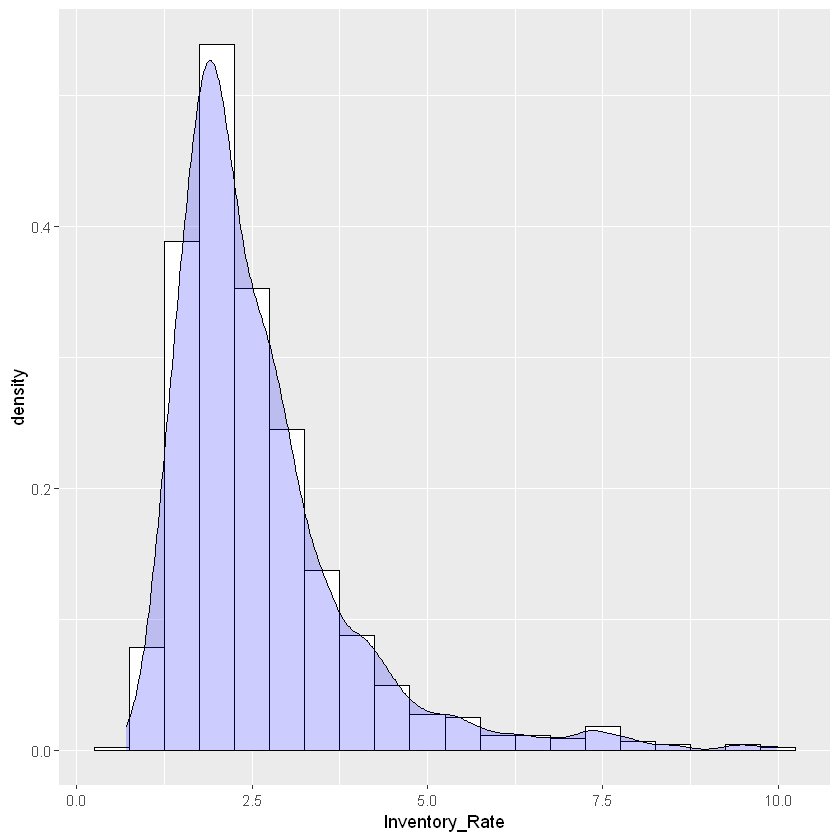

In [13]:
# density plots of Inventory_Rate
c <- Store_data [which(Store_data$Inventory_Rate<=10),]
ggplot(c, aes(x=Inventory_Rate)) + 
  geom_histogram(aes(y=..density..),binwidth=.5,colour="black", fill="white") +
  geom_density(alpha=0.2, fill='blue')

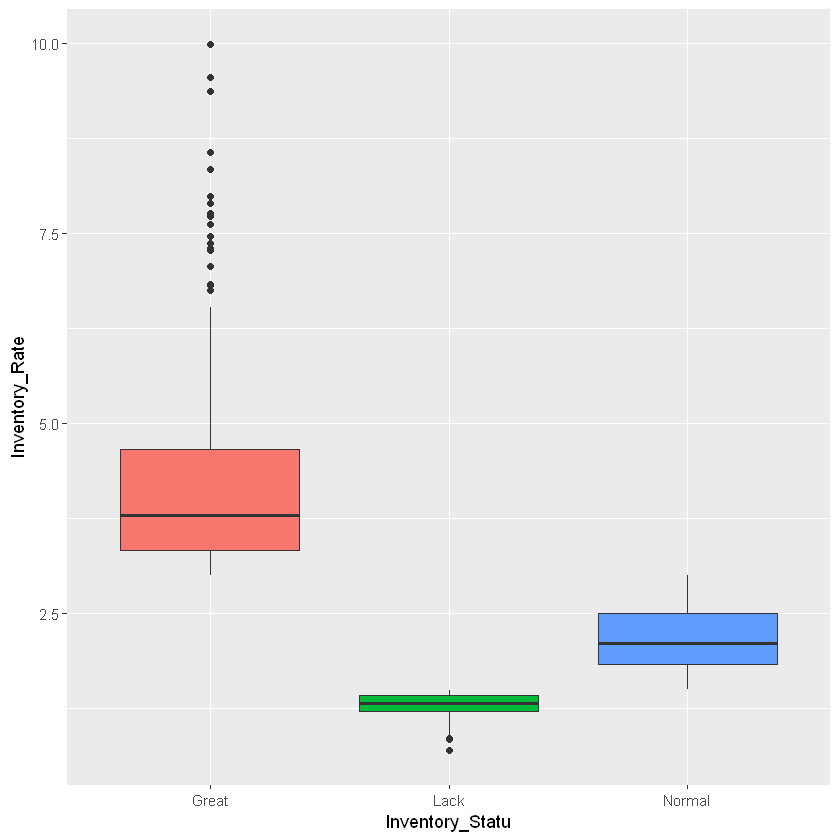

In [14]:
# Box Plot of Inventory_Rate
ggplot(c, aes(x=Inventory_Statu, y=Inventory_Rate, fill=Inventory_Statu)) + geom_boxplot() +
  guides(fill="none")

### Details of Inventory_Rate products

In [15]:
# Analyze large Inventory_Rate products
d <- Store_data [which(Store_data$Inventory_Rate>5),]
summary(d)

  ï..Store.ID      Store_Area   Items_Available Daily_Customer_Count
 Min.   :  2.0   Min.   :1156   Min.   :1398    Min.   : 10.0       
 1st Qu.:214.5   1st Qu.:1464   1st Qu.:1756    1st Qu.:225.0       
 Median :503.0   Median :1624   Median :1968    Median :310.0       
 Mean   :465.8   Mean   :1639   Mean   :1968    Mean   :287.8       
 3rd Qu.:686.5   3rd Qu.:1824   3rd Qu.:2197    3rd Qu.:355.0       
 Max.   :888.0   Max.   :2044   Max.   :2474    Max.   :450.0       
  Store_Sales    Inventory_Rate    Inventory_Statu   
 Min.   :32330   Min.   :  5.030   Length:51         
 1st Qu.:53790   1st Qu.:  5.566   Class :character  
 Median :63850   Median :  6.752   Mode  :character  
 Mean   :63886   Mean   : 10.428                     
 3rd Qu.:77550   3rd Qu.:  7.830                     
 Max.   :92370   Max.   :151.600                     

It is clear that large Inventory_Rate products have low demand. Should decrease inventory level of those products in the future

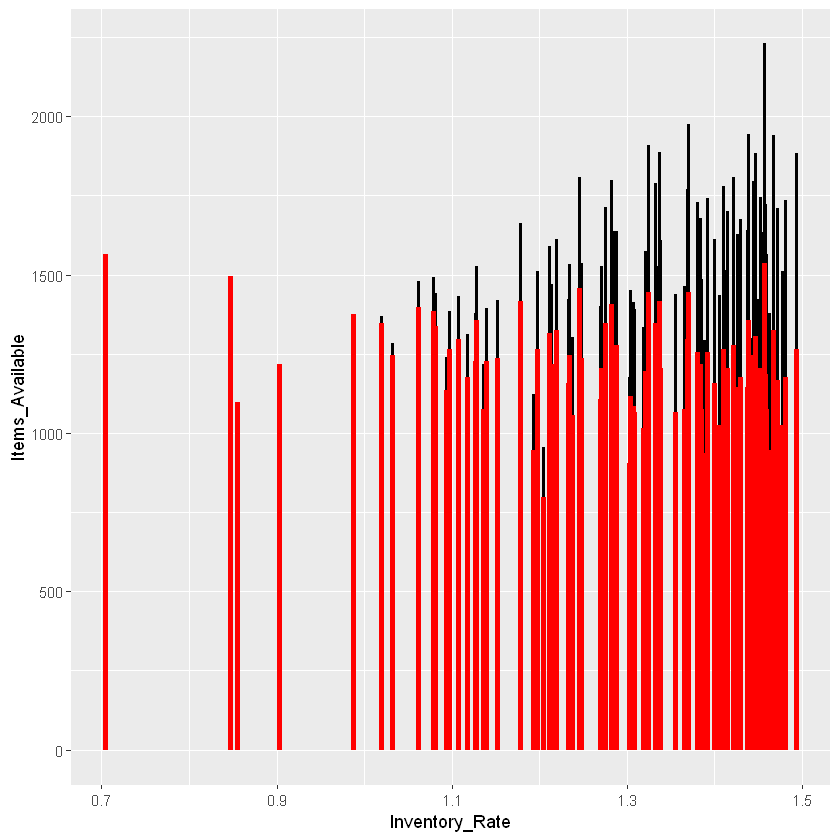

In [16]:
# Analyze lack Inventory_Rate products
e <- Store_data [which(Store_data$Inventory_Rate<1.5),]

ggplot(e, aes(x = Inventory_Rate)) + 
  geom_col(aes(y = Items_Available), size = 1, color = "black", fill = "white") +
  geom_col(aes(y = Daily_Customer_Count), size = 1.5, color="red", group = 1)




It is clear that lack Inventory_Rate products have high demand and low inventory.

For those lack Inventory_Rate products, should prepare sufficient inventory.

## Inventory and Product Analysis by Tableau

<div class='tableauPlaceholder' id='viz1659370860935' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ta&#47;TableauAnalysis_16593708175350&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='TableauAnalysis_16593708175350&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ta&#47;TableauAnalysis_16593708175350&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1659370860935');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1200px';vizElement.style.height='1027px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1200px';vizElement.style.height='1027px';} else { vizElement.style.width='100%';vizElement.style.height='1627px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Tableau Link: https://public.tableau.com/app/profile/jie.jian4826/viz/TableauAnalysis_16593708175350/Dashboard1